# K-Means For Image Compression

In [1]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')

## Loading Original Image

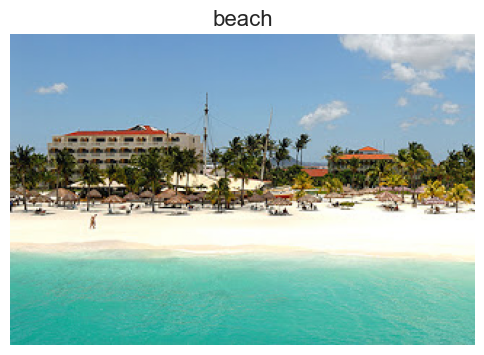

In [2]:
from skimage import io, img_as_float
I = io.imread('beach.bmp')
I = img_as_float(I)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(I)
ax.set_title('beach', fontsize=16)
ax.axis('off')
plt.show()

- This image is stored as a 3D numpy array, I.
- I[i,j,k]: i is row index, j is column index, and k is channel (color) index
I[0,0] is the pixel at row-0 and col-0, and it has three values r,g,b

In [3]:
I.shape

(214, 320, 3)

In [13]:
I[0,0]

array([0.43137255, 0.60392157, 0.78823529])

## Preparing Image For Compression

each row of X should be a data point - a pixel with three values (R, G, B) <br>
X should have many rows and 3 columns <br>
X is converted from `I`, you may try the function `reshape` <br>
The data type of the matrix `X` should be float32

In [ ]:
X = I.reshape(-1, 3).astype(np.float32)
X.dtype

dtype('float32')

## Preform k-means on data matrix X

In [6]:
#your code, k is the number of clusters
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
model = kmeans.fit(X)
labels = model.predict(X)


In [7]:
# centers stores the cluster centers
centers = model.cluster_centers_
centers[labels].shape

(68480, 3)

## Compress the image using the cluster centers
Assume you have obtained some cluster centers, e.g., c1, c2, c3 
Every data point (i.e. every pixel of the image) is assigned to one of the clusters.

In [ ]:
Ic = centers[labels].reshape(I.shape)
Ic.shape


## Visualize the compressed the image

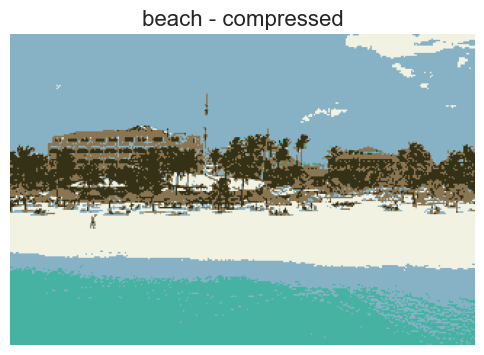

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(Ic)
ax.set_title('beach - compressed', fontsize=16)
ax.axis('off')
plt.show()

## Save Compressed Image

In [11]:
# normalize the pixel values in the range of 0 ~ 255
Is=255*(Ic- Ic.min())/(Ic.max()-Ic.min())
# chagne datay type to uint8
Is=Is.astype('uint8')
io.imsave('beach_compressed_k' + str(k) + '.bmp', Is)


You may find out that the two files, beach.bmp and beach_compressed.bmp, have the same size. <br>
So, it seems nothing is compressed.  <br>
Now, zip the two files: beach.bmp and beach_compressed.bmp <br>
Compare the sizes of the zipped files : beach.zip and beach_compressed.zip <br>
Then, you will know it.  <br>